# Review

# ANOVA

The analysis of variance (ANOVA) can be thought of as an extension to the t-test. The independent t-test is used to compare the means of a condition between 2 groups. ANOVA is used when one wants to compare the means of a condition between 3+ groups. ANOVA tests the data as a whole. Another way to say that is this, ANOVA tests if there is a difference in the mean somewhere in the model (testing if there was an overall effect), but it does not tell one where the difference is if the there is one. To find out where the difference is between the groups, one has to conduct post-hoc tests.

## Assumptions

There are 3 assumptions that need to be met for the results of an ANOVA test to be considered accurate and trust worthy. It’s important to note the the assumptions apply to the residuals and not the variables themselves. The ANOVA assumptions are the same as for linear regression and are:

1 - Normality - 
Caveat to this is, if group sizes are equal, the F-statistic is robust to violations of normality

2 - Homogeneity of variance - 
Same caveat as above, if group sizes are equal, the F-statistic is robust to this violation

3 - Independent observations

## Lets Try an Example

### Question:

#### Which Drug dosage improve sleep the best?

In [ ]:
# our groups: 
High_dose = [25,30,28,36,29]
Medium_dose = [45,55,29,56,40]
Low_dose = [30,29,33,37,27]
Placebo = [54,60,51,62,73]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data1 = np.array([High_dose,Medium_dose,Low_dose,Placebo])
df = pd.DataFrame(data=data1.transpose(), columns = ['High_dose','Medium_dose','Low_dose','Placebo'])

In [ ]:
print(df)
df.boxplot(column = ['High_dose','Medium_dose','Low_dose','Placebo'], grid=False)
plt.show()

If we ignore the information about the dosage, the best estimation we could give for a sleeptime for the drug would be between ~20 and ~75 minutes. Let’s for now call this total variation.

The next step is to split this total variation in two: **Between-Group Variation** and **Within-Group Variation**

**Between-Group Variation is explained by our drug type:**

If we know which dosage is taken, we can give a more precise range of sleep times.

If High Dose is taken, it takes between ~20 and ~35 minutes. 

If Medium Dose is taken, it takes between ~30 and ~55 minutes.

If Low Dose is taken, it takes between ~25 and ~35 minutes.

If Placebo is taken, it takes between ~50 and ~75 minutes.


This phenomenon is due to the Between-Group variation: a quantification of the variation explained by our variable.

**Within-Group Variation is not Explained by our drug type:**

However, there is also some part of variation that cannot be explained by our variable ‘Drug’: It refers to variations caused by differences within individual groups (or levels). In other words, not all the values within each group (e.g. means) are the same.

Since we do not have those new variables, the variation remains unexplained and is called the within-group variation.

## F-score

The statistical test that is central in ANOVA is the F-test. 

**H0: The null hypothesis states that the mean of all groups is equal, which implies that our model has no explanatory value and that we don’t have proof for choosing one drug over another.**

**HA: The alternative hypothesis states that at least one of the means is different, which would be a reason to go more in-depth and find out which drug works better?**

The F-score is a ratio that compares variance between groups (explained variance) to variance within groups (unexplained/residual variance). It is used to test if multiple (3+) groups have significantly different means.

**F = between-group variance/within-group variance**

OR

**F = MSexplained/MSresidual**
    
Used when comparing means across three or more groups.

**F-score Interpretation:**

If groups are truly different: 
- Between-group variance is LARGE compared to within-group variance
- F is LARGE 

If groups are the same: 
- Between-group variance = Within-group variance 
- F ≈ 1

Use F-score lookup table to determine significance. The higher the F-value, the lower the corresponding p-value

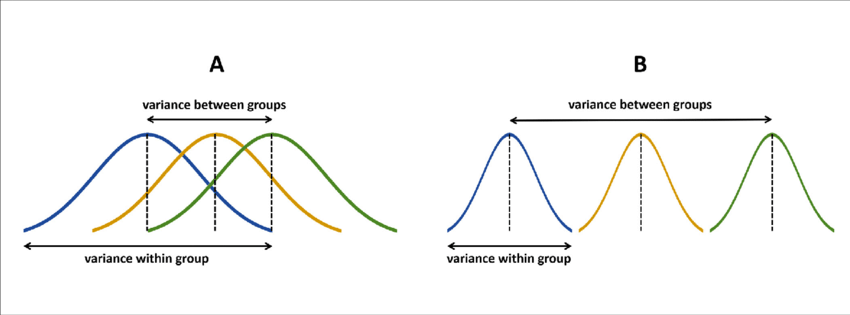

### Let's look at how the F-score is calculated

Remember our equation for calculating variance:

Takes the **sum of squares** and divides it by the **degrees of freedom** (DOF).

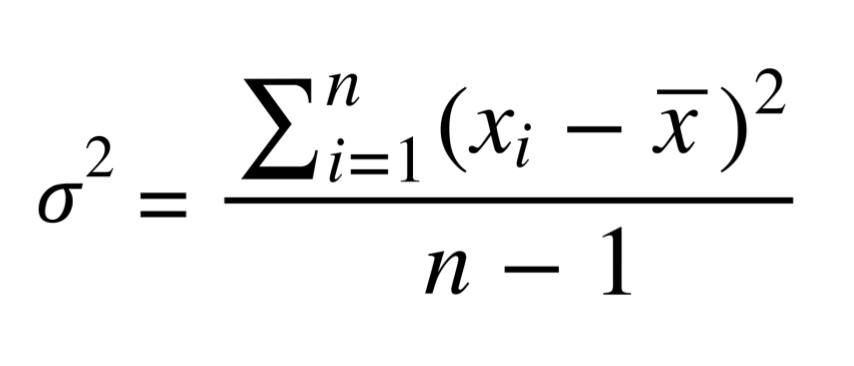

**Calculating between-group variance (explained variance):**

How different are the means of each group?

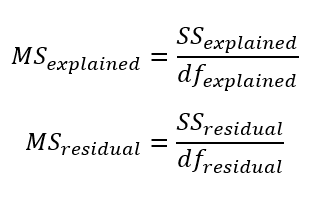

- High_dose = [25,30,28,36,29]
- Medium_dose = [45,55,29,56,40]
- Low_dose = [30,29,33,37,27]
- Placebo = [54,60,51,62,73]

Overall mean = 41.45

- High_dose: (25-41.45)² + (30-41.45)² + (28-41.45)² + (36-41.45)² + (29-41.45)² = 702.1125
- Medium_dose: (45-41.45)² + (55-41.45)² + (29-41.45)² + (56-41.45)² + (40-41.45)² = 63.0125
- Low_dose: (30-41.45)² + (29-41.45)² + (33-41.45)² + (37-41.45)² + (27-41.45)² = 525.3125
- placebo: (54-41.45)² + (60-41.45)² + (51-41.45)² + (62-41.45)² + (73-41.45)² = 1720.5125

Sum of squares combined = 3010.95

DOF = 3 ---> 4 - 1 = 3 (number of groups - 1)

**Between-group variance = 3010.95/3 = 1003.65**

**Calculating within-group variance (unexplained variance):**

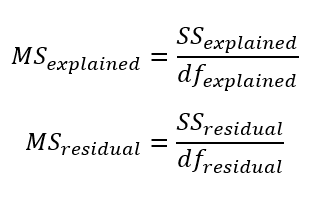
    
- High_dose = [25,30,28,36,29], mean = 29.6
- Medium_dose = [45,55,29,56,40], mean = 45
- Low_dose = [30,29,33,37,27], mean = 31.2
- Placebo = [54,60,51,62,73], mean = 60


- High_dose: (25-29.6)² + (30-29.6)² + (28-29.6)² + (36-29.6)² + (29-29.6)² = 65.2
- Medium_dose: (45-45)² + (55-45)² + (29-45)² + (56-45)² + (40-45)² = 502
- Low_dose: (30-31.2)² + (29-31.2)² + (33-31.2)² + (37-31.2)² + (27-31.2)² = 60.8
- Placebo: (54-60)² + (60-60)² + (51-60)² + (62-60)² + (73-60)² = 290
    
Sum of squares combined = 918

DOF = 16 ---> (total samples - number of groups)

**Within-group variance = 918/16 = 57.375**

### Calculating F

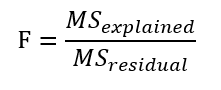

Between-group variance/Within-group variance = 1003.65/57.375 = 17.492810458

### Calculating F in Python

In [ ]:
### lets calculate the means and see what we get here...
print(data1)
print("The group means are: High_dose ", np.mean(data1,1)[0]," Medium_dose: ", np.mean(data1,1)[1], ", Low_dose: ", np.mean(data1,1)[2], ", Placebo: ", np.mean(data1,1)[3])


In [ ]:
import scipy.stats as stats
fvalue, pvalue = stats.f_oneway(df['High_dose'], df['Medium_dose'], df['Low_dose'], df['Placebo'])
print("The f-Value is: ", fvalue, " The p-value is: ", pvalue)

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
data_vals = (data1).reshape(-1,1)[:,0]
# print(data_vals)
data_heads = ['High_dose']*5+['Medium_dose']*5+['Low_dose']*5+['Placebo']*5
data_tot = [[data_heads[num] , i ]for num,i in enumerate(data_vals)]

df_data = pd.DataFrame(data_tot, columns= ['Dose','SleepTime'])

lm = ols('SleepTime ~ Dose',data=df_data).fit()
table = sm.stats.anova_lm(lm)
print(table)

## So we know that there is a difference here but where??

#### So the question is: Which dose do we pick???



# Post-Hoc Testing

This is where post-hoc testing comes in:

And there are a variety of post-hoc tests, Tukeys, Fisher's Least Significant Difference Test, Games-Howell, etc.

In [ ]:
# TUKEY’S HSD (honestly significant difference) 
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = pairwise_tukeyhsd(df_data['SleepTime'],df_data['Dose'])
mc_results = mc.summary()

# Print results summary
print(mc_results)

In [ ]:
# Get the Tukey results as a DataFrame
results_df = pd.DataFrame(data=mc.summary().data[1:], 
                          columns=mc.summary().data[0])

# Convert numeric columns to float
results_df['meandiff'] = results_df['meandiff'].astype(float)
results_df['lower'] = results_df['lower'].astype(float)
results_df['upper'] = results_df['upper'].astype(float)

# Create comparison labels (group1 - group2)
results_df['comparison'] = results_df['group1'] + ' - ' + results_df['group2']

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot each confidence interval
for idx, row in results_df.iterrows():
    # Plot the confidence interval as a horizontal line
    ax.plot([row['lower'], row['upper']], [idx, idx], 'k-', linewidth=1.5)
    
    # Plot the mean difference as a point
    ax.plot(row['meandiff'], idx, 'ko', markersize=5)

# Add a vertical line at zero
ax.axvline(x=0, color='gray', linestyle='--', linewidth=1)

# Customize the plot
ax.set_yticks(range(len(results_df)))
ax.set_yticklabels(results_df['comparison'])
ax.set_xlabel('Difference in Means', fontsize=12)
ax.set_title('95% Family-Wise Confidence Level', fontsize=14)
ax.grid(axis='x', alpha=0.3)
ax.invert_yaxis()  # Put first comparison at top

plt.tight_layout()
plt.show()

# Calculating model effect size

Something that is useful is the effect size. The effect size tells us how much of an impact the experiment will have in the real world. There are a few different effect sizes one can use: eta squared, and omega squared. Omega squared is considered a better measure of effect size than eta squared because it is unbiased in it’s calculation.

The effect size does not replace the results of a statistical hypothesis test. Instead, the effect size complements the test. Ideally, the results of both the hypothesis test and the effect size calculation would be presented side-by-side.

Hypothesis Test: Quantify the likelihood of observing the data given an assumption (null hypothesis).

Effect Size: Quantify the size of the effect assuming that the effect is present

The Two Measures

**Eta Squared (η²): 0.766 (76.6%)**

- Simply calculates: variance explained by Drug ÷ total variance
- Formula: Drug sum_sq / (Drug sum_sq + Residual sum_sq)
- In your case: 3010.95 / (3010.95 + 918.00) = 0.766
- Tends to overestimate the effect size, especially with smaller samples

**Omega Squared (ω²): 0.712 (71.2%)**

- Adjusts for bias by accounting for degrees of freedom
- Formula: (Drug SS - Drug df × Residual MS) / (Total SS + Residual MS)
- More conservative and considered more accurate for population estimates

In [ ]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(table)

That means the current model accounts for 71-76% of the variance in contributing to drug. 

This deoesn't mean that dose causes 71-76% of the variance (correlation ≠ causation), but rather that knowing someone's dose group allows you to account for most of the variability in their sleep time. The remaining ~25-29% is unexplained variance (individual differences, measurement error, other factors). 

**Why both F-score and effect size matter:**

Your hypothesis test (the F-test with p = 0.000026) tells you: "Yes, there's a statistically significant difference between drug groups."

Your effect sizes tell you: "And this difference is large and meaningful - the drug explains 71-76% of why outcomes vary."

## Other Types of ANOVAs


Repeated Measures ANOVA and 1 and 2 ways:


One-Way ANOVA

- **What it tests:** One independent variable (factor) with 2+ levels
- **Example:** Testing 4 drug conditions (High dose, Medium dose, Low dose, Placebo) - like what we just analyzed!
- **Key feature:** Each participant is in only ONE group (between-subjects design)
- **Question it answers:** "Do the groups differ on the outcome?"

Two-Way ANOVA

- **What it tests:** TWO independent variables simultaneously, plus their interaction
- **Example:** Drug condition (4 levels) AND gender (2 levels) = 8 different group combinations
- **Key features:**
    - Tests main effect of Factor 1 (Drug)
    - Tests main effect of Factor 2 (Gender)
    - Tests interaction effect (Does drug effectiveness differ by gender?)
- **Question it answers:** "Do both factors matter, and do they work together in some way?"

Factorial ANOVA (two-way, three-way, etc.) --> When you are testing multiple factors and their interactions

Repeated Measures ANOVA

- **What it tests:** One factor, but the SAME participants are measured multiple times
- **Example:** Testing the same patients at baseline, week 1, week 2, and week 3 after taking a drug
- **Key feature:** Each participant appears in ALL conditions (within-subjects design)
- **Question it answers:** "Do measurements change across the repeated conditions?"
- **Why it's different:** It accounts for the fact that measurements from the same person are correlated with each other

### Example 1: One-Way Repeated Measures ANOVA

The Setup:
- Same subjects measured under different conditions (cond)
- Outcome variable: reaction time (rt)

In [ ]:
import pandas as pd
from statsmodels.stats.anova import AnovaRM

df = pd.read_csv('https://raw.githubusercontent.com/BlohmLab/NSCI801-QuantNeuro/master/Figures/rmAOV1way.csv')
print(df)

In [ ]:
aovrm = AnovaRM(df, 'rt', 'Sub_id', within=['cond'])
res = aovrm.fit()
res.summary()

### Example 2: Two-Way Repeated Measures ANOVA
    
The Setup:
- Same subjects measured under combinations of TWO factors (iv1 and iv2)
- Outcome: still reaction time (rt)

In [ ]:
df2way = pd.read_csv('https://raw.githubusercontent.com/BlohmLab/NSCI801-QuantNeuro/master/Figures/rmAOV2way.csv')
print(df2way)

In [ ]:
aovrm2way = AnovaRM(df2way, 'rt', 'Sub_id', within=['iv1', 'iv2'])
res2way = aovrm2way.fit()
res2way.summary()

**Key Difference Between the Two Examples**

Example 1: Tests one factor --> "Does condition matter?"

Example 2: Tests two factors --> "Does iv1 matter? Does iv2 matter? Do they interact?"

### Another Example:
- This data is fictional; a study was conducted to test the effect of 2 new fertilizers, and the amount of water on the mean crop yield.
- Two-way ANOVA ---> TWO independent variables simultaneously (fertilizer and water), plus their interaction
- NOT repeated measure ---> each row represents a different observation (likely different plots of land or different experimental units), not the same subject measured multiple times.

In [ ]:
import pandas
import researchpy as rp
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp

df = pandas.read_csv("https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master/crop_yield.csv")

In [ ]:
print(df)

Looking at yield across different factors

In [ ]:
rp.summary_cont(df['Yield'])

In [ ]:
rp.summary_cont(df.groupby(['Fert']))['Yield']

In [ ]:
rp.summary_cont(df.groupby(['Fert', 'Water']))['Yield']

In [ ]:
# Fits the model with the interaction term
# This will also automatically include the main effects for each factor
model = ols('Yield ~ C(Fert)*C(Water)', df).fit()
table = sm.stats.anova_lm(model)

# Seeing if the overall model is significant
print(table)

# Seeing if the overall model is significant
print(f"\nOverall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")

The interaction term is not significant. This indicates that there is no interaction effect between the type of fertilizer and the amount of water on the mean crop yield. Since this is not significant, the interaction term is to be removed from the model and it needs to be re-ran so we can look at the main effects of each factor independently.

In [ ]:
# Fits the model without interaction term
model2 = ols('Yield ~ C(Fert) + C(Water)', df).fit()
table = sm.stats.anova_lm(model2)
print(table)
print(f"\nOverall model F({model2.df_model: .0f},{model2.df_resid: .0f}) = {model2.fvalue: .3f}, p = {model2.f_pvalue: .4f}")

**Proper Workflow:**

This is why you should always use ANOVA table first to decide which factors/interactions to keep, then use regression output to interpret the specific effects. 

# Multiple Regression

**Linear regression** (also called simple linear regression) examines the relationship between one predictor variable and one outcome variable. Think of it like: How does X affect Y?

**Multiple regression** (or multiple linear regression) examines the relationship between two or more predictor variables and one outcome variable. It's like: How do X₁, X₂, X₃... together affect Y?

So, multiple linear regression attempts to model the relationship between two or more features and a response by fitting a linear equation to observed data. The steps to perform multiple linear regression are similar to that of simple linear regression. The difference lies in the evalution.

We can use it to find out which factor has the highest impact on the predicted output and how different variables relate to each other.

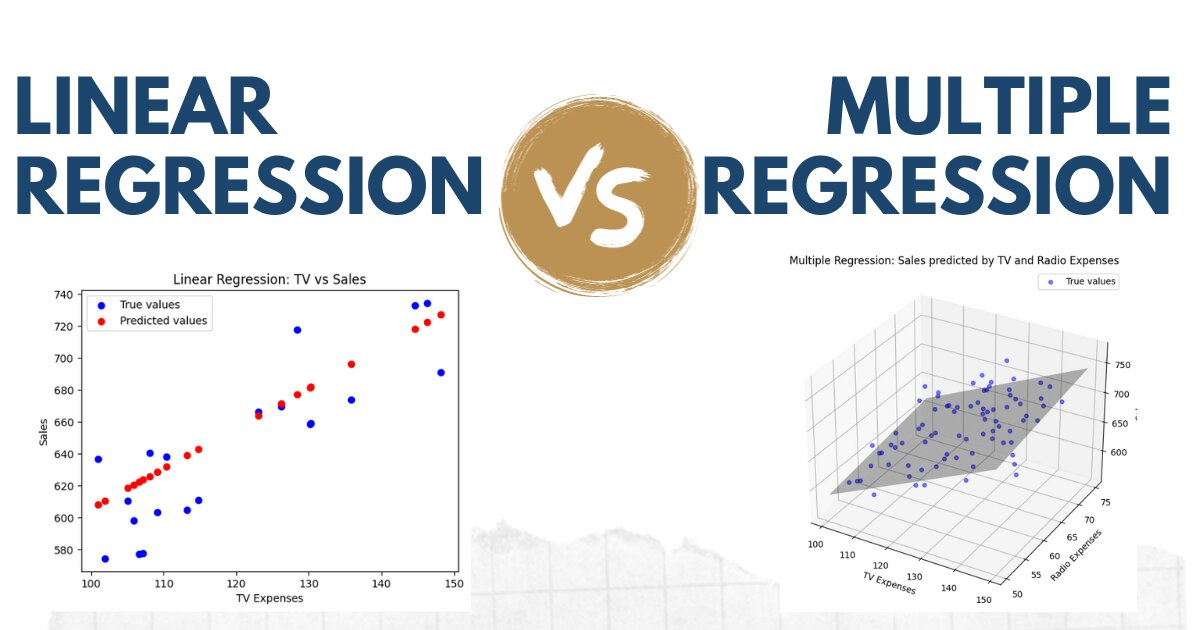

**Linear Regression:** y = b0 + b1*x1

**Multiple Regression:** y = b0 + b1*x1 + b2*x2 + b3*x3 +…… bn*xn 

where:
- y = Dependent variable and 
- x1, x2, x3, …… xn = multiple independent variables

Assumption of Regression Model :
1. **Linear relationship** - The relationship between X and Y should follow a straight line, not a curve.
2. **Multivariate normality** - The residuals (prediction errors) should be normally distributed. Note: this is NOT saying X or Y must be normal - it's the errors that matter!
3. **No or little multicollinearity** -  Predictor variables (X's) should not be too highly correlated with each other. They should provide independent information.
4. **No auto-correlation** - Residuals (errors) should be independent of each other. One error shouldn't predict the next error.
5. **Homoscedasticity** - The variance of residuals should be constant across all levels of the predictor. In other words, prediction errors should have the same spread everywhere.

In [ ]:
import pandas as pd

# Read the csv file.
df=pd.read_csv('https://raw.githubusercontent.com/BlohmLab/NSCI801-QuantNeuro/master/Figures/multiple-linear-regression-dataset.csv')

# Print the first 5 rows of the data set.
df.head()

In [ ]:
from sklearn.linear_model import LinearRegression

# Create linear regression object.
model = LinearRegression()

# Assign dependent and independent variables
X, y = df[['deneyim','maas']], df['yas']

# Fit linear regression.
model.fit(X, y) # predicting 'yas' using two predictors:'deneyim' and 'maas'

print(model.intercept_) # get the y-intercept
print(model.coef_) # get the coefficients
print(model.score(X, y)) # get r-squared

Interpreting the Output:

**Intercept (21.67):** The predicted yas when both deneyim and maas are zero.

**Coefficients [1.45, -0.00046]:** 
- For each additional unit of 'deneyim', 'yas' increases by ~1.45
- For each additional unit of 'maas', 'yas' decreases by ~0.00046

## Non-Parametric Tests

Not all Data is normally disritbuted, or even conforms to the simple assumptions we've made!


So how do we overcome this - we need statistical tests to help us test things EVEN if those assumptions aren't met

There are MANY non-parametric tests, but we will only go over the following:


**Mann-Whitney U test** - for comparing independent data samples: the nonparametric version of the independent samples t-test.

**Wilcoxon signed-rank test** - for comparing paired data samples: the nonparametric version of the paired t-test.

**The Kruskal-Wallis H test** - for comparing more than two data samples: the nonparametric version of the one-way ANOVA test

**Friedman test** - for comparing more than two data samples: the nonparametric version of repeated measures ANOVA test.

## Mann-Whitney Test


The Mann-Whitney U test is a nonparametric statistical significance test for determining whether two independent samples were drawn from a population with the same distribution.

**H0: The samples are drawn from the same distribution (medians are the same)**

**HA: The samples come from populations with different distributions (medians are different)**

The test was named for Henry Mann and Donald Whitney, although it is sometimes called the Wilcoxon-Mann-Whitney test, also named for Frank Wilcoxon, who also developed a variation of the test.

The two samples are combined and rank ordered together. The strategy is to determine if the values from the two samples are randomly mixed in the rank ordering or if they are clustered at opposite ends when combined. A random rank order would mean that the two samples are not different, while a cluster of one sample values would indicate a difference between them

**STEPS:**
- Pool all data from both groups together
- Assign ranks from smallest (rank 1) to largest (rank n)
- For tied values, assign the average of the ranks they would have occupied
- Calculate rank sum for each group
- Calculate U-stat for each group
- Compare the smaller U value to lookup table (n<20) or compute z-score (n>20) to determine significance

https://real-statistics.com/statistics-tables/mann-whitney-table/

In [ ]:
# generate gaussian data samples and perform Mann-Whitney U test
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
from scipy.stats import mannwhitneyu

# seed the random number generator
seed(1)
# generate two sets of univariate observations
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 51

# summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))

# perform Mann-Whitney U test
stat, p = mannwhitneyu(data1, data2)
print('\nMann-Whitney U Test:')
print('U statistic=%.3f, p-value=%.3f' % (stat, p))

# interpret the result
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

## Wilcoxon Signed-Rank Test

In some cases, the data samples may be paired.

There are many reasons why this may be the case, for example, the samples are related or matched in some way or represent two measurements of the same technique. More specifically, each sample is independent, but comes from the same population.

**H0: The median difference between paired observations is zero (no systematic difference between the two related measurements)**

**HA: The median difference between paired observations is not zero (two-tailed), OR the median difference is greater/less than zero (one-tailed)**

Examples of paired samples in machine learning might be the same algorithm evaluated on different datasets or different algorithms evaluated on exactly the same training and test data.

The samples are not independent, therefore the Mann-Whitney U test cannot be used. Instead, the Wilcoxon signed-rank test is used, also called the Wilcoxon T test, named for Frank Wilcoxon. It is the equivalent of the paired Student T-test, but for ranked data instead of real valued data with a Gaussian distribution.

The Wilcoxon signed ranks test is a nonparametric statistical procedure for comparing two samples that are paired, or related. The parametric equivalent to the Wilcoxon signed ranks test goes by names such as the Student’s t-test, t-test for matched pairs, t-test for paired samples, or t-test for dependent samples.

**STEPS:**
- compute differences
- remove zeros
- rank absolute differences from smallest to largest, ties are averaged
- reattach signs
- sum positive ranks and sum negative ranks
- Using lowest abs value, compute significance

https://users.stat.ufl.edu/~winner/tables/wilcox_signrank.pdf

In [ ]:
# Wilcoxon signed-rank test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import wilcoxon
# seed the random number generator
seed(1)
# generate two independent samples
# randn generates a NumPy array of n random floating-point numbers sampled from the standard normal distribution
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 51
# print(data1)
# print(data2)
# compare samples
stat, p = wilcoxon(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

## Kruskal-Wallis H Test

When working with significance tests, such as Mann-Whitney U and the Wilcoxon signed-rank tests, comparisons between data samples must be performed pair-wise. This can be inefficient if you have many data samples and you are only interested in whether two or more samples have a different distribution.

The Kruskal-Wallis H test is a non-parametric alternative to one-way ANOVA used to compare three or more independent groups. It tests whether the groups come from the same distribution by comparing their ranks rather than their actual values. It is named for the developers of the method, William Kruskal and Wilson Wallis. 

**H0: All data samples were drawn from the same distribution (medians are the same)**

**HA: At least one group comes from a population with a different distribution (medians are different).**

When the Kruskal-Wallis H-test leads to significant results, then at least one of the samples is different from the other samples. However, the test does not identify where the difference(s) occur. Moreover, it does not identify how many differences occur. To identify the particular differences between sample pairs, a researcher might use sample contrasts, or post hoc tests, to analyze the specific sample pairs for significant difference(s). The Mann-Whitney U-test is a useful method for performing sample contrasts between individual sample sets.

**STEPS:**
- Pool all data from k groups together
- Assign ranks from smallest (rank 1) to largest (rank n)
- Calculate rank sum for each group
- Calculate H-stat 
- Compare to chi-squared lookup table

https://math.arizona.edu/~jwatkins/chi-square-table.pdf

In [ ]:
# generate three independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 50
data3 = 5 * randn(100) + 52

# Kruskal-Wallis H-test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import kruskal
# seed the random number generator
seed(1)
# generate three independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 50
data3 = 5 * randn(100) + 52
# compare samples
stat, p = kruskal(data1, data2, data3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

## Friedman Test

As in the previous example, we may have more than two different samples and an interest in whether all samples have the same distribution or not.

If the samples are paired in some way, such as repeated measures, then the Kruskal-Wallis H test would not be appropriate. Instead, the Friedman test can be used, named for Milton Friedman.

The Friedman test is the nonparametric version of the repeated measures analysis of variance test, or repeated measures ANOVA.

**H0: The distributions (or medians) are the same across all k related groups/conditions**

**HA: At least one group/condition has a different distribution**

The test assumes two or more paired data samples with 10 or more samples per group. When the Friedman test leads to significant results, you can run a post hoc pairwise comparisons like the Wilcoxon signed-rank test to determine which specific groups differ. 

**STEPS:**
- For each subject (row), assign ranks from smallest (rank 1) to largest (rank k)
- Calculate rank sum for each group
- Calculate the Friedman test statistic (χ²ᶠ) 
- Compare to chi-squared lookup table

**Key difference from Kruskal-Wallis:** Ranking is done across rows, not across all data

https://math.arizona.edu/~jwatkins/chi-square-table.pdf

In [ ]:
# Friedman test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import friedmanchisquare
# seed the random number generator
seed(1)
# generate three independent samples
data1 = 5 * randn(100) + 50
data2 = 5 * randn(100) + 50
data3 = 5 * randn(100) + 52
# compare samples
stat, p = friedmanchisquare(data1, data2, data3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')